# 目的
アテンションの動作のハンズオンを行い、動作について理解する。

## やっていることの説明
Tokyo is beautiful.

という文章に仮に埋め込み表現を定義する。

仮のアテンションレイヤをランダムベクトルを使って定義する。
中身はランダムなので意味のあるアテンションではない点に注意のこと。



In [1]:
# ===============================
# Self-Attention 可視化ハンズオン
# ===============================
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==== 入力トークン定義 ====
tokens = ["Tokyo", "is", "beautiful"]
x = torch.tensor([
    [1.0, 0.5, 0.3, 0.2],   # Tokyo
    [0.2, 0.1, 0.9, 0.7],   # is
    [0.8, 0.3, 0.2, 0.4]    # beautiful
])  # shape: [3, 4]

d_model = x.shape[1]
print("入力ベクトル形状:", x.shape)

# ==== Q, K, V の線形変換 ====
torch.manual_seed(42)  # 再現性のため固定
W_Q = torch.randn(d_model, d_model)
W_K = torch.randn(d_model, d_model)
W_V = torch.randn(d_model, d_model)

入力ベクトル形状: torch.Size([3, 4])


Q、K、Vを各重みを基に計算する。


| 要素          | 記号                                                       | 役割                       | 数式 |
| ------------- | ---------------------------------------------------------- | -------------------------- | ---- |
| Query         | ( Q = XW_Q )                                               | どの情報を取りたいか       | –   |
| Key           | ( K = XW_K )                                               | どの情報を持っているか     | –   |
| Value         | ( V = XW_V )                                               | 実際の情報内容             | –   |
| Attention出力 | ( \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right)V ) | 関係性に基づいた重み付き和 | ✅   |

In [3]:
Q = x @ W_Q   # [3, 4]
K = x @ W_K   # [3, 4]
V = x @ W_V   # [3, 4]

アテンションスコアを計算する。

In [4]:
# ==== Attentionスコアと重み ====
scores = (Q @ K.T) / np.sqrt(d_model)
attention_weights = F.softmax(scores, dim=-1)

# ==== 出力 ====
output = attention_weights @ V

# ==== 数値出力 ====
print("Attentionスコア:\n", scores)
print("\nAttention重み:\n", attention_weights)
print("\n出力ベクトル:\n", output)

Attentionスコア:
 tensor([[-0.9278, -1.1897, -0.8915],
        [-1.3221, -1.1264, -1.0722],
        [-0.5750, -0.7502, -0.5598]])

Attention重み:
 tensor([[0.3563, 0.2742, 0.3695],
        [0.2857, 0.3475, 0.3668],
        [0.3503, 0.2940, 0.3557]])

出力ベクトル:
 tensor([[-2.0674,  0.5481, -0.9448,  0.5110],
        [-2.1110,  0.7316, -1.0240,  0.3894],
        [-2.0806,  0.5901, -0.9639,  0.4811]])


結果を可視化する。

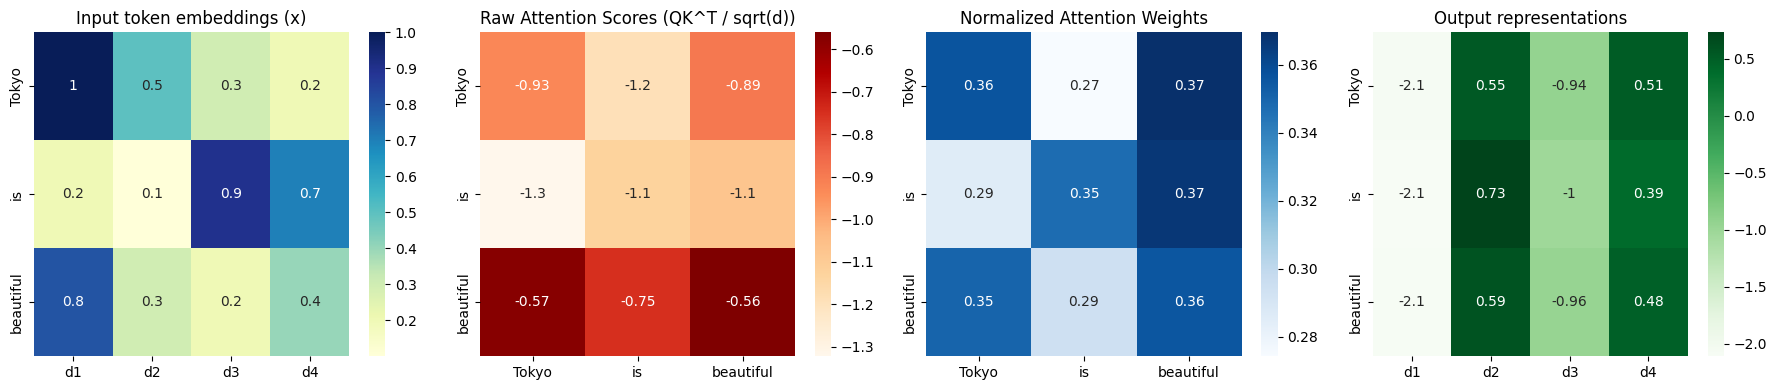

In [5]:
# =======================
# ==== 可視化パート ====
# =======================

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# ① 入力ベクトル可視化
sns.heatmap(x.numpy(), annot=True, cmap="YlGnBu", ax=axes[0],
            xticklabels=[f"d{i+1}" for i in range(d_model)],
            yticklabels=tokens)
axes[0].set_title("Input token embeddings (x)")

# ② Attentionスコア
sns.heatmap(scores.detach().numpy(), annot=True, cmap="OrRd", ax=axes[1],
            xticklabels=tokens, yticklabels=tokens)
axes[1].set_title("Raw Attention Scores (QK^T / sqrt(d))")

# ③ Attention重み (Softmax後)
sns.heatmap(attention_weights.detach().numpy(), annot=True, cmap="Blues", ax=axes[2],
            xticklabels=tokens, yticklabels=tokens)
axes[2].set_title("Normalized Attention Weights")

# ④ 出力ベクトル
sns.heatmap(output.detach().numpy(), annot=True, cmap="Greens", ax=axes[3],
            xticklabels=[f"d{i+1}" for i in range(d_model)],
            yticklabels=tokens)
axes[3].set_title("Output representations")

plt.tight_layout()
plt.show()
